## Import Libraries

In [ ]:
import os
import pandas as pd
import neurokit2 as nk

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['figure.dpi'] = 120

%matplotlib tk

# Constants
sampling_rate = 1000
data_folder = './rest_data_v2'

In [2]:
# Get all parquet files
parquet_files = [f for f in os.listdir(data_folder) if f.endswith('.parquet')]
print(f"Found {len(parquet_files)} parquet files to process\n")

Found 64 parquet files to process



# Quality control using Neurokit2

In [5]:
# Process all ECG files in parallel using joblib
from joblib import Parallel, delayed

def process_ecg_file(filename, data_folder, sampling_rate):
    """Process a single ECG file and return quality metrics"""
    print(f"Processing: {filename}")
    
    # Extract subject number
    subject_num = int(filename.split('_')[0].replace('sub-', ''))
    
    filepath = os.path.join(data_folder, filename)
    data = pd.read_parquet(filepath)
    ecg_signal = data['ecg_nk']
    
    # Process ECG
    signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
    
    # Clean signal and get R-peaks for quality assessment
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
    rpeaks = info['ECG_R_Peaks']
    
    # Calculate ECG quality
    quality_score = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, method='averageQRS')
    
    # Convert to scalar if it's an array
    if hasattr(quality_score, '__len__'):
        quality_score = float(quality_score[0]) if len(quality_score) > 0 else float(quality_score)
    else:
        quality_score = float(quality_score)
    
    result = {
        'subject': subject_num,
        'quality': quality_score,
        'filename': filename,
        'mean_hr': signals['ECG_Rate'].mean(),
        'n_rpeaks': len(rpeaks)
    }
    
    print(f"  ✅ {filename} - HR: {result['mean_hr']:.1f} bpm, Quality: {quality_score:.3f}\n")
    
    return result



# Process in parallel using all available cores (n_jobs=-1)
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(process_ecg_file)(filename, data_folder, sampling_rate) 
    for filename in parquet_files
)

# Create quality DataFrame from results
quality = pd.DataFrame(results)[['subject', 'quality']]
quality = quality.sort_values('subject').reset_index(drop=True)

print("\nAll files processed!")
print(f"Total subjects: {len(results)}")
print("\nQuality DataFrame:")
display(quality)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Processing: sub-032_task-rest_ecg_rest.parquet
Processing: sub-033_task-rest_ecg_rest.parquet
Processing: sub-034_task-rest_ecg_rest.parquet
Processing: sub-035_task-rest_ecg_rest.parquet
Processing: sub-036_task-rest_ecg_rest.parquet
Processing: sub-038_task-rest_ecg_rest.parquet
Processing: sub-039_task-rest_ecg_rest.parquet
Processing: sub-040_task-rest_ecg_rest.parquet
Processing: sub-041_task-rest_ecg_rest.parquet
Processing: sub-042_task-rest_ecg_rest.parquet
Processing: sub-043_task-rest_ecg_rest.parquet
Processing: sub-044_task-rest_ecg_rest.parquet
  ✅ sub-034_task-rest_ecg_rest.parquet - HR: 75.7 bpm, Quality: 0.391

Processing: sub-045_task-rest_ecg_rest.parquet


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s


  ✅ sub-036_task-rest_ecg_rest.parquet - HR: 78.4 bpm, Quality: 0.874

Processing: sub-046_task-rest_ecg_rest.parquet
  ✅ sub-032_task-rest_ecg_rest.parquet - HR: 81.0 bpm, Quality: 0.806

Processing: sub-047_task-rest_ecg_rest.parquet
  ✅ sub-038_task-rest_ecg_rest.parquet - HR: 67.8 bpm, Quality: 0.828

Processing: sub-048_task-rest_ecg_rest.parquet
  ✅ sub-040_task-rest_ecg_rest.parquet - HR: 93.8 bpm, Quality: 0.156

Processing: sub-049_task-rest_ecg_rest.parquet
  ✅ sub-039_task-rest_ecg_rest.parquet - HR: 73.8 bpm, Quality: 0.741

Processing: sub-050_task-rest_ecg_rest.parquet
  ✅ sub-033_task-rest_ecg_rest.parquet - HR: 79.3 bpm, Quality: 0.000

Processing: sub-051_task-rest_ecg_rest.parquet
  ✅ sub-042_task-rest_ecg_rest.parquet - HR: 84.8 bpm, Quality: 0.645

Processing: sub-052_task-rest_ecg_rest.parquet


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s


  ✅ sub-035_task-rest_ecg_rest.parquet - HR: 76.6 bpm, Quality: 0.928

Processing: sub-053_task-rest_ecg_rest.parquet
  ✅ sub-043_task-rest_ecg_rest.parquet - HR: 88.0 bpm, Quality: 0.090

Processing: sub-054_task-rest_ecg_rest.parquet
  ✅ sub-044_task-rest_ecg_rest.parquet - HR: 103.5 bpm, Quality: 0.940

Processing: sub-055_task-rest_ecg_rest.parquet
  ✅ sub-041_task-rest_ecg_rest.parquet - HR: 92.2 bpm, Quality: 0.810

Processing: sub-056_task-rest_ecg_rest.parquet
  ✅ sub-045_task-rest_ecg_rest.parquet - HR: 71.8 bpm, Quality: 0.000

Processing: sub-057_task-rest_ecg_rest.parquet
  ✅ sub-052_task-rest_ecg_rest.parquet - HR: 68.4 bpm, Quality: 0.985

Processing: sub-058_task-rest_ecg_rest.parquet
  ✅ sub-049_task-rest_ecg_rest.parquet - HR: 66.2 bpm, Quality: 0.467

Processing: sub-059_task-rest_ecg_rest.parquet
  ✅ sub-046_task-rest_ecg_rest.parquet - HR: 91.9 bpm, Quality: 0.945

Processing: sub-060_task-rest_ecg_rest.parquet
  ✅ sub-055_task-rest_ecg_rest.parquet - HR: 59.0 bpm, 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s


  ✅ sub-053_task-rest_ecg_rest.parquet - HR: 67.8 bpm, Quality: 0.522

Processing: sub-064_task-rest_ecg_rest.parquet
  ✅ sub-054_task-rest_ecg_rest.parquet - HR: 64.6 bpm, Quality: 0.585

Processing: sub-065_task-rest_ecg_rest.parquet
  ✅ sub-056_task-rest_ecg_rest.parquet - HR: 68.1 bpm, Quality: 0.592

Processing: sub-067_task-rest_ecg_rest.parquet
  ✅ sub-051_task-rest_ecg_rest.parquet - HR: 90.7 bpm, Quality: 0.533

Processing: sub-068_task-rest_ecg_rest.parquet
  ✅ sub-047_task-rest_ecg_rest.parquet - HR: 70.5 bpm, Quality: 0.824

Processing: sub-069_task-rest_ecg_rest.parquet
  ✅ sub-057_task-rest_ecg_rest.parquet - HR: 71.9 bpm, Quality: 0.883

Processing: sub-070_task-rest_ecg_rest.parquet
  ✅ sub-058_task-rest_ecg_rest.parquet - HR: 85.1 bpm, Quality: 0.899

Processing: sub-071_task-rest_ecg_rest.parquet
  ✅ sub-062_task-rest_ecg_rest.parquet - HR: 83.3 bpm, Quality: 0.532

Processing: sub-072_task-rest_ecg_rest.parquet
  ✅ sub-059_task-rest_ecg_rest.parquet - HR: 83.5 bpm, Q

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s


  ✅ sub-061_task-rest_ecg_rest.parquet - HR: 68.3 bpm, Quality: 0.829

Processing: sub-074_task-rest_ecg_rest.parquet
  ✅ sub-060_task-rest_ecg_rest.parquet - HR: 90.5 bpm, Quality: 0.480

Processing: sub-075_task-rest_ecg_rest.parquet
  ✅ sub-063_task-rest_ecg_rest.parquet - HR: 78.3 bpm, Quality: 0.917

Processing: sub-076_task-rest_ecg_rest.parquet
  ✅ sub-070_task-rest_ecg_rest.parquet - HR: 66.3 bpm, Quality: 0.000

Processing: sub-077_task-rest_ecg_rest.parquet
  ✅ sub-065_task-rest_ecg_rest.parquet - HR: 109.9 bpm, Quality: 0.838

Processing: sub-078_task-rest_ecg_rest.parquet
  ✅ sub-064_task-rest_ecg_rest.parquet - HR: 104.9 bpm, Quality: 0.956

Processing: sub-079_task-rest_ecg_rest.parquet
  ✅ sub-067_task-rest_ecg_rest.parquet - HR: 81.7 bpm, Quality: 0.968

Processing: sub-080_task-rest_ecg_rest.parquet
  ✅ sub-068_task-rest_ecg_rest.parquet - HR: 82.0 bpm, Quality: 0.958

  ✅ sub-069_task-rest_ecg_rest.parquet - HR: 51.0 bpm, Quality: 0.989

Processing: sub-081_task-rest_

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.0s


  ✅ sub-072_task-rest_ecg_rest.parquet - HR: 77.5 bpm, Quality: 0.893

Processing: sub-083_task-rest_ecg_rest.parquet
  ✅ sub-071_task-rest_ecg_rest.parquet - HR: 78.7 bpm, Quality: 0.781

Processing: sub-084_task-rest_ecg_rest.parquet
  ✅ sub-073_task-rest_ecg_rest.parquet - HR: 82.5 bpm, Quality: 0.675

Processing: sub-085_task-rest_ecg_rest.parquet
  ✅ sub-074_task-rest_ecg_rest.parquet - HR: 77.4 bpm, Quality: 0.000

Processing: sub-086_task-rest_ecg_rest.parquet
  ✅ sub-075_task-rest_ecg_rest.parquet - HR: 61.9 bpm, Quality: 0.519

Processing: sub-087_task-rest_ecg_rest.parquet
  ✅ sub-076_task-rest_ecg_rest.parquet - HR: 85.7 bpm, Quality: 0.627

Processing: sub-088_task-rest_ecg_rest.parquet
  ✅ sub-080_task-rest_ecg_rest.parquet - HR: 70.3 bpm, Quality: 0.650

Processing: sub-089_task-rest_ecg_rest.parquet
  ✅ sub-078_task-rest_ecg_rest.parquet - HR: 82.2 bpm, Quality: 0.968

Processing: sub-090_task-rest_ecg_rest.parquet
  ✅ sub-077_task-rest_ecg_rest.parquet - HR: 62.6 bpm, Q

[Parallel(n_jobs=-1)]: Done  48 out of  64 | elapsed:    9.3s remaining:    3.1s


  ✅ sub-083_task-rest_ecg_rest.parquet - HR: 70.5 bpm, Quality: 0.148

Processing: sub-095_task-rest_ecg_rest.parquet
  ✅ sub-081_task-rest_ecg_rest.parquet - HR: 86.7 bpm, Quality: 0.639

Processing: sub-096_task-rest_ecg_rest.parquet
  ✅ sub-084_task-rest_ecg_rest.parquet - HR: 65.0 bpm, Quality: 0.611

Processing: sub-097_task-rest_ecg_rest.parquet
  ✅ sub-085_task-rest_ecg_rest.parquet - HR: 90.2 bpm, Quality: 0.896

Processing: sub-098_task-rest_ecg_rest.parquet
  ✅ sub-086_task-rest_ecg_rest.parquet - HR: 74.6 bpm, Quality: 0.961

  ✅ sub-089_task-rest_ecg_rest.parquet - HR: 74.4 bpm, Quality: 0.524

  ✅ sub-087_task-rest_ecg_rest.parquet - HR: 67.0 bpm, Quality: 0.350

  ✅ sub-090_task-rest_ecg_rest.parquet - HR: 68.2 bpm, Quality: 0.000



[Parallel(n_jobs=-1)]: Done  55 out of  64 | elapsed:   10.5s remaining:    1.7s


  ✅ sub-088_task-rest_ecg_rest.parquet - HR: 84.6 bpm, Quality: 0.279

  ✅ sub-092_task-rest_ecg_rest.parquet - HR: 93.4 bpm, Quality: 0.914

  ✅ sub-091_task-rest_ecg_rest.parquet - HR: 85.0 bpm, Quality: 0.819

  ✅ sub-095_task-rest_ecg_rest.parquet - HR: 75.9 bpm, Quality: 0.445

  ✅ sub-093_task-rest_ecg_rest.parquet - HR: 83.0 bpm, Quality: 0.306

  ✅ sub-098_task-rest_ecg_rest.parquet - HR: 71.2 bpm, Quality: 0.720

  ✅ sub-097_task-rest_ecg_rest.parquet - HR: 87.5 bpm, Quality: 0.640



[Parallel(n_jobs=-1)]: Done  62 out of  64 | elapsed:   11.5s remaining:    0.4s


  ✅ sub-096_task-rest_ecg_rest.parquet - HR: 94.1 bpm, Quality: 0.843


All files processed!
Total subjects: 64

Quality DataFrame:


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   11.7s finished


,subject,quality
0,32,0.806438
1,33,0.000000
2,34,0.391169
3,35,0.927766
4,36,0.874194
...,...,...
59,93,0.306268
60,95,0.444831
61,96,0.842800
62,97,0.639950


In [6]:
# Filter for good quality data (quality >= 0.5)
good_quality = quality[quality['quality'] >= 0.5].reset_index(drop=True)

print(f"Total subjects: {len(quality)}")
print(f"Good quality subjects (>= 0.5): {len(good_quality)}")
print(f"Excluded subjects: {len(quality) - len(good_quality)}")
print(f"\nGood quality DataFrame:")
display(good_quality)

Total subjects: 64
Good quality subjects (>= 0.5): 47
Excluded subjects: 17

Good quality DataFrame:


,subject,quality
0,32,0.806438
1,35,0.927766
2,36,0.874194
3,38,0.828422
4,39,0.741239
5,41,0.810123
6,42,0.645329
7,44,0.939645
8,46,0.944851
9,47,0.823826


## Debug: Investigate Zero Quality Scores
Subjects 33, 35, 55, 74, 82, 90 all have quality=0.0. Let's debug this with single-threaded processing to identify the issue.

In [8]:
# Debug subjects with zero quality
debug_subjects = [33, 45, 55, 74, 82, 90]

# Find the corresponding filenames
debug_files = []
for f in parquet_files:
    subject_num = int(f.split('_')[0].replace('sub-', ''))
    if subject_num in debug_subjects:
        debug_files.append(f)

print(f"Found {len(debug_files)} files for debug subjects")
print("Files:", debug_files)
print("\n" + "="*80)

# Process each debug subject with detailed logging (single-threaded)
debug_results = []
for filename in sorted(debug_files):
    subject_num = int(filename.split('_')[0].replace('sub-', ''))
    print(f"\n{'='*80}")
    print(f"Processing: sub-{subject_num} ({filename})")
    print(f"{'='*80}")
    
    try:
        filepath = os.path.join(data_folder, filename)
        
        # Check file exists and size
        file_size = os.path.getsize(filepath)
        print(f"✓ File exists, size: {file_size} bytes")
        
        # Load data
        data = pd.read_parquet(filepath)
        print(f"✓ Parquet loaded: shape={data.shape}, columns={data.columns.tolist()}")
        
        ecg_signal = data['ecg_nk']
        print(f"✓ ECG signal shape: {ecg_signal.shape}, dtype: {ecg_signal.dtype}")
        print(f"  Min: {ecg_signal.min():.4f}, Max: {ecg_signal.max():.4f}, Mean: {ecg_signal.mean():.4f}")
        print(f"  Non-NaN values: {ecg_signal.notna().sum()}")
        
        # Check for issues
        if len(ecg_signal) == 0:
            print("⚠️  WARNING: Empty ECG signal!")
            debug_results.append({'subject': subject_num, 'status': 'empty_signal', 'quality': None})
            continue
            
        if ecg_signal.isna().all():
            print("⚠️  WARNING: All NaN values!")
            debug_results.append({'subject': subject_num, 'status': 'all_nan', 'quality': None})
            continue
        
        # Process ECG
        signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
        print(f"✓ ECG processed: signals shape={signals.shape}")
        
        # Clean signal
        ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
        print(f"✓ ECG cleaned: shape={ecg_cleaned.shape}")
        
        # Get R-peaks
        rpeaks = info['ECG_R_Peaks']
        print(f"✓ R-peaks detected: {len(rpeaks)} peaks")
        
        if len(rpeaks) == 0:
            print("⚠️  WARNING: No R-peaks detected!")
        
        # Calculate quality with detailed inspection
        quality_score = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, method='averageQRS')
        print(f"✓ Quality score (raw): {quality_score} (type: {type(quality_score).__name__})")
        
        # Check the raw value
        if hasattr(quality_score, '__len__'):
            print(f"  Array-like, length: {len(quality_score)}, contents: {quality_score}")
            quality_score_scalar = float(quality_score[0]) if len(quality_score) > 0 else float(quality_score)
        else:
            quality_score_scalar = float(quality_score)
        
        print(f"✓ Quality score (converted): {quality_score_scalar:.6f}")
        
        # Additional metrics
        mean_hr = signals['ECG_Rate'].mean()
        print(f"✓ Mean HR: {mean_hr:.1f} bpm")
        
        debug_results.append({
            'subject': subject_num,
            'status': 'success',
            'quality': quality_score_scalar,
            'n_rpeaks': len(rpeaks),
            'mean_hr': mean_hr,
            'signal_length': len(ecg_signal)
        })
        
    except Exception as e:
        print(f"❌ ERROR: {type(e).__name__}: {str(e)}")
        import traceback
        traceback.print_exc()
        debug_results.append({'subject': subject_num, 'status': f'error: {type(e).__name__}', 'quality': None})

print("\n" + "="*80)
print("SUMMARY OF DEBUG RESULTS:")
print("="*80)
debug_df = pd.DataFrame(debug_results)
display(debug_df)

Found 6 files for debug subjects
Files: ['sub-033_task-rest_ecg_rest.parquet', 'sub-045_task-rest_ecg_rest.parquet', 'sub-055_task-rest_ecg_rest.parquet', 'sub-074_task-rest_ecg_rest.parquet', 'sub-082_task-rest_ecg_rest.parquet', 'sub-090_task-rest_ecg_rest.parquet']


Processing: sub-33 (sub-033_task-rest_ecg_rest.parquet)
✓ File exists, size: 6071971 bytes
✓ Parquet loaded: shape=(185921, 4), columns=['time', 'ecg_raw', 'ecg_mod', 'ecg_nk']
✓ ECG signal shape: (185921,), dtype: float64
  Min: -0.1214, Max: 0.0705, Mean: -0.0225
  Non-NaN values: 185921
✓ ECG processed: signals shape=(185921, 19)
✓ ECG cleaned: shape=(185921,)
✓ R-peaks detected: 244 peaks
✓ Quality score (raw): [0. 0. 0. ... 0. 0. 0.] (type: ndarray)
  Array-like, length: 185921, contents: [0. 0. 0. ... 0. 0. 0.]
✓ Quality score (converted): 0.000000
✓ Mean HR: 79.3 bpm

Processing: sub-45 (sub-045_task-rest_ecg_rest.parquet)
✓ File exists, size: 6041828 bytes
✓ Parquet loaded: shape=(240001, 4), columns=['time', 'e

,subject,status,quality,n_rpeaks,mean_hr,signal_length
0,33,success,0.000000e+00,244,79.268079,185921
1,45,success,1.110223e-16,287,71.768594,240001
2,55,success,0.000000e+00,235,59.047389,240001
3,74,success,1.110223e-16,309,77.389335,240001
4,82,success,1.110223e-16,353,87.192356,243161
5,90,success,0.000000e+00,278,68.201063,245341


## Single Subject Quality Analysis
Manually test one subject at a time. Edit the `sub` variable to change subjects.

In [20]:
# ============ EDIT THIS VARIABLE ============
sub = 69  # Change this to test different subjects (33, 45, 55, 74, 82, 90)
# ============================================

print(f"\nAnalyzing subject: sub-{sub}")
print("="*80)

# Find file for this subject
matching_files = [f for f in parquet_files if f.split('_')[0] == f'sub-{sub:03d}']

if not matching_files:
    print(f"❌ No files found for sub-{sub}")
else:
    filename = matching_files[0]
    print(f"Found file: {filename}\n")
    
    filepath = os.path.join(data_folder, filename)
    
    # Load data
    print("Loading data...")
    data = pd.read_parquet(filepath)
    ecg_signal = data['ecg_nk']
    print(f"  ECG shape: {ecg_signal.shape}")
    print(f"  Range: [{ecg_signal.min():.4f}, {ecg_signal.max():.4f}]")
    print(f"  Mean: {ecg_signal.mean():.4f}")
    print(f"  Non-NaN: {ecg_signal.notna().sum()}\n")
    
    # Process ECG
    print("Processing ECG...")
    signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)
    print(f"  ✓ ECG processed\n")
    
    # Clean and extract R-peaks
    print("Cleaning signal and detecting R-peaks...")
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
    rpeaks = info['ECG_R_Peaks']
    print(f"  ✓ Cleaned signal shape: {ecg_cleaned.shape}")
    print(f"  ✓ R-peaks detected: {len(rpeaks)}\n")
    
    # Calculate quality
    print("Calculating quality score...")
    quality_score_raw = nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=sampling_rate, method='averageQRS')
    print(f"  Raw quality score: {quality_score_raw}")
    print(f"  Type: {type(quality_score_raw).__name__}\n")
    
    # Convert to scalar
    if hasattr(quality_score_raw, '__len__'):
        quality_score = float(quality_score_raw[0]) if len(quality_score_raw) > 0 else float(quality_score_raw)
    else:
        quality_score = float(quality_score_raw)
    
    print("="*80)
    print(f"RESULTS FOR SUB-{sub}:")
    print("="*80)
    print(f"Quality Score: {quality_score:.6f}")
    print(f"Mean HR: {signals['ECG_Rate'].mean():.1f} bpm")
    print(f"Number of R-peaks: {len(rpeaks)}")
    print(f"Signal length: {len(ecg_signal)} samples ({len(ecg_signal)/sampling_rate:.1f} seconds)")
    print("="*80)


Analyzing subject: sub-69
Found file: sub-069_task-rest_ecg_rest.parquet

Loading data...
  ECG shape: (302941,)
  Range: [0.0171, 0.7515]
  Mean: 0.3676
  Non-NaN: 302941

Processing ECG...
  ✓ ECG processed

Cleaning signal and detecting R-peaks...
  ✓ Cleaned signal shape: (302941,)
  ✓ R-peaks detected: 257

Calculating quality score...
  Raw quality score: [0.98856264 0.98856264 0.98856264 ... 0.         0.         0.        ]
  Type: ndarray

RESULTS FOR SUB-69:
Quality Score: 0.988563
Mean HR: 51.0 bpm
Number of R-peaks: 257
Signal length: 302941 samples (302.9 seconds)
  ✓ ECG processed

Cleaning signal and detecting R-peaks...
  ✓ Cleaned signal shape: (302941,)
  ✓ R-peaks detected: 257

Calculating quality score...
  Raw quality score: [0.98856264 0.98856264 0.98856264 ... 0.         0.         0.        ]
  Type: ndarray

RESULTS FOR SUB-69:
Quality Score: 0.988563
Mean HR: 51.0 bpm
Number of R-peaks: 257
Signal length: 302941 samples (302.9 seconds)


## Visualization: Plot Weird Subject Data
Plot ECG signal, R-peaks, and quality metrics for the current subject.

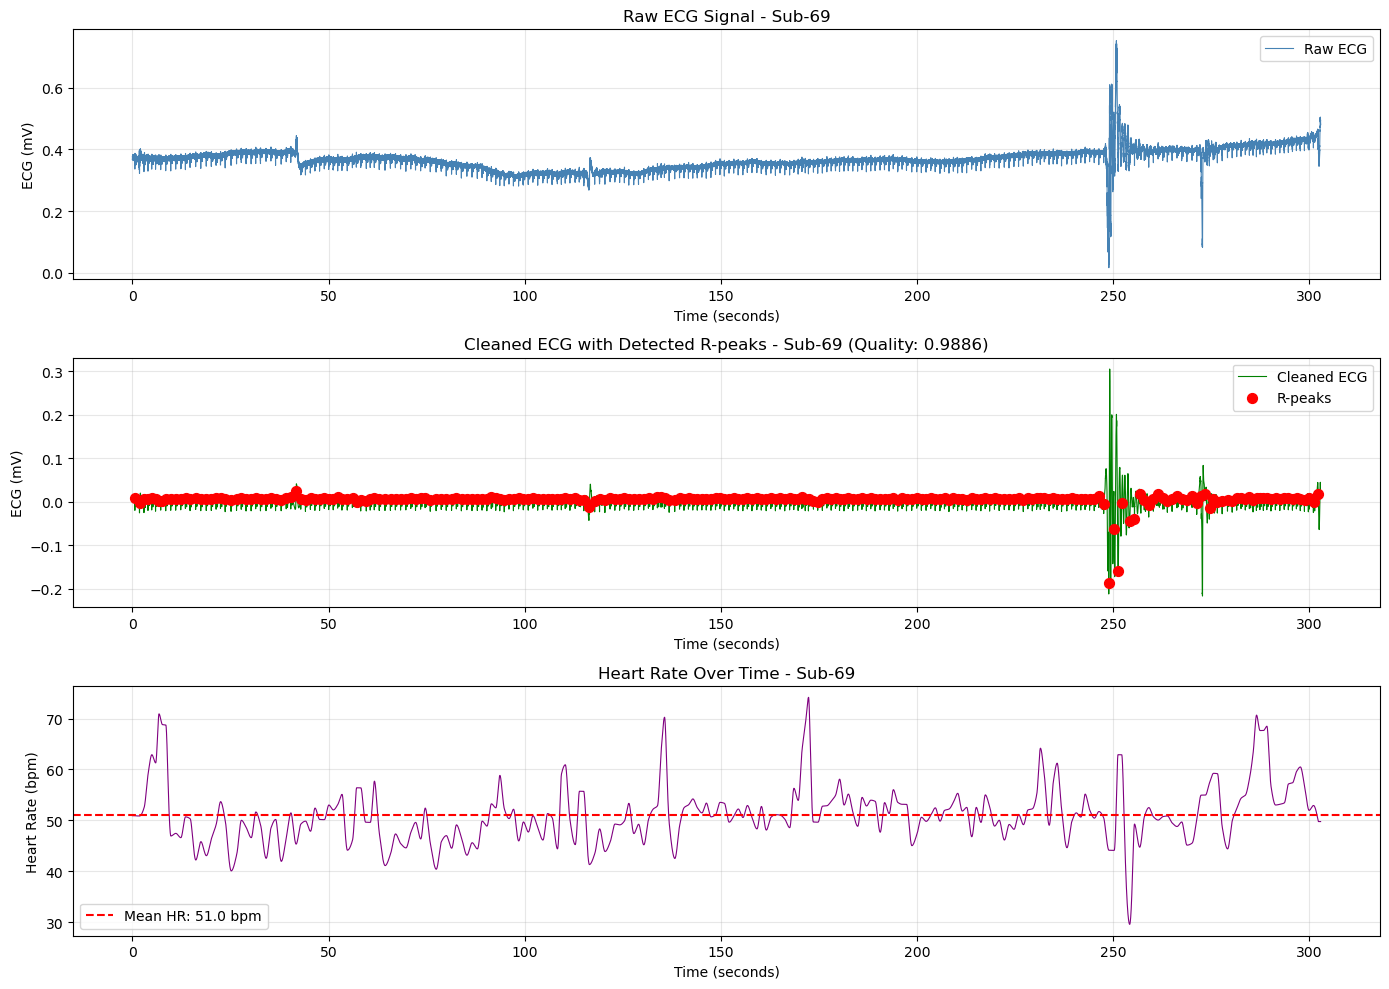


📊 Plot Summary for Sub-69:
  - Quality Score: 0.988563
  - R-peaks Found: 257
  - Mean HR: 51.0 bpm
  - HR Range: [29.5, 74.2] bpm


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a comprehensive plot for the current subject
if 'ecg_signal' in locals():
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    # Time axis in seconds
    time = np.arange(len(ecg_signal)) / sampling_rate
    
    # Plot 1: Raw ECG signal
    axes[0].plot(time, ecg_signal, label='Raw ECG', linewidth=0.8, color='steelblue')
    axes[0].set_xlabel('Time (seconds)')
    axes[0].set_ylabel('ECG (mV)')
    axes[0].set_title(f'Raw ECG Signal - Sub-{sub}')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Plot 2: Cleaned ECG with R-peaks
    axes[1].plot(time, ecg_cleaned, label='Cleaned ECG', linewidth=0.8, color='green')
    axes[1].scatter(time[rpeaks], ecg_cleaned[rpeaks], color='red', s=50, label='R-peaks', zorder=5)
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('ECG (mV)')
    axes[1].set_title(f'Cleaned ECG with Detected R-peaks - Sub-{sub} (Quality: {quality_score:.4f})')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    # Plot 3: Heart Rate over time
    axes[2].plot(time, signals['ECG_Rate'], linewidth=0.8, color='purple')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Heart Rate (bpm)')
    axes[2].set_title(f'Heart Rate Over Time - Sub-{sub}')
    axes[2].axhline(y=signals['ECG_Rate'].mean(), color='red', linestyle='--', label=f'Mean HR: {signals["ECG_Rate"].mean():.1f} bpm')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Plot Summary for Sub-{sub}:")
    print(f"  - Quality Score: {quality_score:.6f}")
    print(f"  - R-peaks Found: {len(rpeaks)}")
    print(f"  - Mean HR: {signals['ECG_Rate'].mean():.1f} bpm")
    print(f"  - HR Range: [{signals['ECG_Rate'].min():.1f}, {signals['ECG_Rate'].max():.1f}] bpm")
else:
    print("❌ No subject data loaded. Run the previous cell first with a subject number.")

DIAGNOSTIC ANALYSIS: Why is quality 0.0?

1️⃣  R-PEAKS DETECTION
   Number of R-peaks: 257
   ✓ Sufficient R-peaks

2️⃣  RR-INTERVALS (distances between R-peaks)
   Intervals: [1180 1143 1015  954  979  846  872  873 1279 1265 1288 1184 1193 1422
 1310 1394 1293 1219 1118 1204 1498 1388 1200 1235 1288 1162 1223 1411
 1237 1196 1431 1285 1166 1324 1218 1204 1254 1145 1196 1197 1132 1153
 1130 1089 1360 1302 1064 1064 1209 1210 1040 1267 1460 1383 1268 1321
 1346 1259 1210 1295 1145 1322 1486 1310 1277 1348 1222 1288 1391 1316
 1352 1204 1228 1127 1144 1020 1149 1192 1150 1306 1208 1258 1179 1237
 1301 1169 1188 1352 1015  985 1199 1327 1077 1077 1453 1380 1242 1368
 1312 1218 1222 1203 1125 1266 1219 1328 1196 1150 1135  941  854 1218
 1412 1225 1143 1131 1107 1144 1166 1124 1184 1174 1121 1125 1209 1181
 1149 1187 1134 1188 1242 1138 1248 1186 1174 1176 1195 1236 1066 1113
  943  871  809 1208 1209 1137 1135 1116 1092 1033 1132 1088 1163 1229
 1101 1136 1112 1117 1259 1122 1169 1071 11

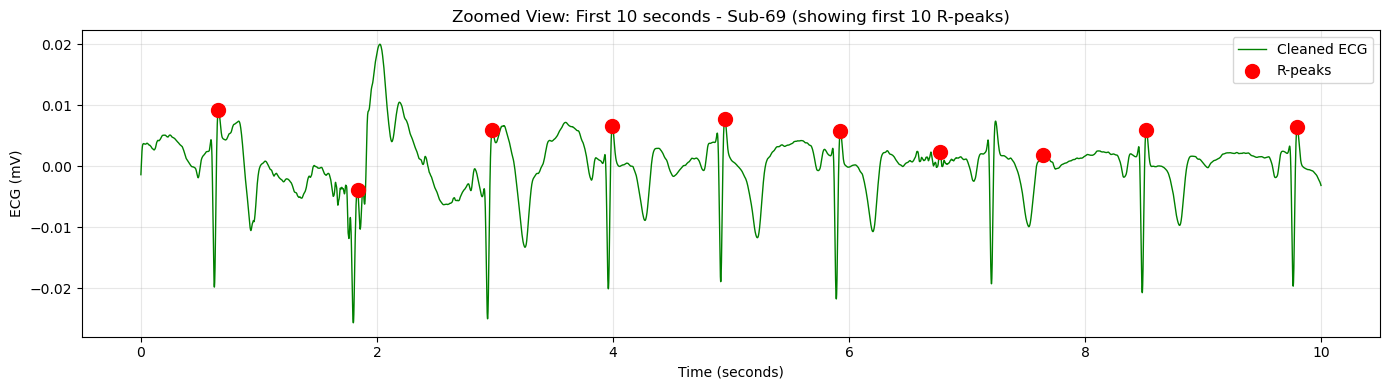


HYPOTHESIS:
✓ R-peaks seem reasonable. The 0.0 quality might be from:
   • Poor QRS delineation (Q and S peaks not detected)
   • Signal preprocessing removing important features
   • Specific issue with nk.ecg_quality() method='averageQRS'


In [22]:
import matplotlib.pyplot as plt
import numpy as np

print("DIAGNOSTIC ANALYSIS: Why is quality 0.0?")
print("="*80)

if 'ecg_signal' in locals() and 'rpeaks' in locals():
    
    # Check 1: R-peaks count
    print(f"\n1️⃣  R-PEAKS DETECTION")
    print(f"   Number of R-peaks: {len(rpeaks)}")
    if len(rpeaks) < 2:
        print(f"   ⚠️  PROBLEM: Need at least 2 R-peaks for quality calculation!")
    else:
        print(f"   ✓ Sufficient R-peaks")
    
    # Check 2: R-peak intervals (RR intervals)
    if len(rpeaks) >= 2:
        rr_intervals = np.diff(rpeaks)
        print(f"\n2️⃣  RR-INTERVALS (distances between R-peaks)")
        print(f"   Intervals: {rr_intervals}")
        print(f"   Mean interval: {rr_intervals.mean():.2f} samples")
        print(f"   Std dev: {rr_intervals.std():.6f} samples")
        print(f"   Min: {rr_intervals.min()}, Max: {rr_intervals.max()}")
        
        if rr_intervals.std() == 0:
            print(f"   ⚠️  PROBLEM: All RR intervals are IDENTICAL! (std=0)")
            print(f"      This causes quality=0 because there's no variation")
        else:
            print(f"   ✓ RR intervals have variation")
    
    # Check 3: QRS delineation (from nk.ecg_process)
    if 'info' in locals():
        print(f"\n3️⃣  QRS DELINEATION")
        if 'ECG_P_Onsets' in info and 'ECG_P_Offsets' in info:
            p_onsets = info['ECG_P_Onsets']
            p_offsets = info['ECG_P_Offsets']
            print(f"   P-wave onsets: {len(p_onsets)} detected")
            print(f"   P-wave offsets: {len(p_offsets)} detected")
        
        if 'ECG_Q_Peaks' in info:
            q_peaks = info['ECG_Q_Peaks']
            print(f"   Q peaks: {len(q_peaks) if q_peaks is not None else 0}")
        if 'ECG_S_Peaks' in info:
            s_peaks = info['ECG_S_Peaks']
            print(f"   S peaks: {len(s_peaks) if s_peaks is not None else 0}")
    
    # Check 4: Signal quality metrics
    print(f"\n4️⃣  SIGNAL QUALITY")
    print(f"   Raw signal - Min: {ecg_signal.min():.4f}, Max: {ecg_signal.max():.4f}")
    print(f"   Cleaned signal - Min: {ecg_cleaned.min():.4f}, Max: {ecg_cleaned.max():.4f}")
    print(f"   Signal range: {ecg_cleaned.max() - ecg_cleaned.min():.4f}")
    print(f"   Signal variance: {ecg_cleaned.var():.6f}")
    
    if ecg_cleaned.var() < 0.001:
        print(f"   ⚠️  PROBLEM: Signal has very low variance (nearly flat)")
    
    # Check 5: Visual inspection with zoomed plot
    print(f"\n5️⃣  ZOOMED VIEW OF FIRST 10 SECONDS")
    zoom_samples = min(10 * sampling_rate, len(ecg_cleaned))
    
    fig, ax = plt.subplots(figsize=(14, 4))
    time_zoom = np.arange(zoom_samples) / sampling_rate
    ax.plot(time_zoom, ecg_cleaned[:zoom_samples], linewidth=1, color='green', label='Cleaned ECG')
    
    # Mark R-peaks in this window
    rpeaks_in_zoom = rpeaks[rpeaks < zoom_samples]
    if len(rpeaks_in_zoom) > 0:
        ax.scatter(time_zoom[rpeaks_in_zoom], ecg_cleaned[rpeaks_in_zoom], color='red', s=100, label='R-peaks', zorder=5)
    
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('ECG (mV)')
    ax.set_title(f'Zoomed View: First 10 seconds - Sub-{sub} (showing first {len(rpeaks_in_zoom)} R-peaks)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("HYPOTHESIS:")
    if len(rpeaks) < 2:
        print("❌ Not enough R-peaks detected - this is the problem")
    elif rr_intervals.std() == 0:
        print("❌ Perfect regularity in R-peaks (no variation) - quality calculation returns 0")
        print("   This could indicate:")
        print("   • Synthetic/fake signal")
        print("   • Noise being mistaken for consistent peaks")
        print("   • Data corruption")
    else:
        print("✓ R-peaks seem reasonable. The 0.0 quality might be from:")
        print("   • Poor QRS delineation (Q and S peaks not detected)")
        print("   • Signal preprocessing removing important features")
        print("   • Specific issue with nk.ecg_quality() method='averageQRS'")
    
else:
    print("❌ No subject data loaded. Run the single subject analysis cell first.")

In [23]:
nk.ecg_quality(ecg_cleaned, rpeaks=rpeaks, sampling_rate=1000, method='zhao2018', approach='fuzzy')

'Excellent'